----------------------------------
# Case Study: Factors Influencing Life Expectancy using **Linear Regression**
----------------------------------

## Context: 
    
- There have been lot of studies undertaken in the past, on factors affecting life expectancy, considering demographic variables, income composition and mortality rates.
- It was found that affect of immunization and human development index was not taken into account in the past.
- Important immunization like Hepatitis B, Polio and Diphtheria will also be considered. In a nutshell, this case study will focus on immunization factors, mortality factors, economic factors, social factors and other health related factors as well.
- In this case study, we will use linear regression to see the effect of various factors on Life Expectancy.

------------------------------

## Problem:

**The data-set aims to answer the following key questions:**

- Does various predicting factors really affect the Life expectancy?
- What are the predicting variables actually affecting the life expectancy?
- Should a country having a lower life expectancy value increase its healthcare expenditure in order to improve its average lifespan?
- Do Infant and Adult mortality rates affect life expectancy?
- Does Life Expectancy has positive or negative correlation with a country's status (developing or developed), lifestyle, GDP,  etc.
- What is the impact of schooling on the lifespan of humans?
- Does Life Expectancy have positive or negative relationship with drinking alcohol?
- What is the impact of Immunization coverage (for various disease like Measles,Hepatitis B) on life Expectancy?

------------------------------

## Attribute Information:

- Country: Country
- Year: Year
- Status: Developed or Developing status
- Life expectancy: Life Expectancy in age
- Adult Mortality: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
- infant deaths: Number of Infant Deaths per 1000 population
- Alcohol: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
- percentage expenditure: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
- Hepatitis B: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
- Measles: Measles - number of reported cases per 1000 population
- BMI: Average Body Mass Index of entire population
- under-five deaths: Number of under-five deaths per 1000 population
- Polio: Polio (Pol3) immunization coverage among 1-year-olds (%)
- Total expenditure: General government expenditure on health as a percentage of total government expenditure (%)
- Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
- HIV/AIDS: Deaths per 1 000 live births HIV/AIDS (0-4 years)
- GDP: Gross Domestic Product per capita (in USD)
- Population: Population of the country
- thinness  1-19 years: Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
- thinness 5-9 years: Prevalence of thinness among children for Age 5 to 9(%)
- Income composition of resources: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
- Schooling: Number of years of Schooling(years)

------------------------
# Concepts to Cover
------------------------
- 1. <a href = #link1>Overview of the data</a>
- 2. <a href = #link2>Data Visualization</a>
- 3. <a href = #link3>Data Preparation</a>
- 4. <a href = #link4>Choose Model, Train and Evaluate</a>
- 5. <a href = #link5>Conclusion</a>
- 6. <a href = #link6>Add-on: Statsmodels</a>

# Let's start coding!

### Import libraries

In [1]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Load and explore the data

In [2]:
# Load the data into pandas dataframe
data = pd.read_csv('Life Expectancy Data.csv')              # Make changes to the path depending on where your data file is stored.

# <a id='link1'>Overview of the data</a>

In [3]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Think about it:

- What do you interpret by looking at the data in the first 5 rows?
- Do you see that each column has different scales of data.
    - e.g. "Life expectancy" column : from 59.2 to 65.0, as we can see, in the first 5 rows.
    - Alcohol: 0.01
    - Measles: from 430 to 3013

    So, what do you think about the effect of the different scales (so features are 100 times of the other features, will the numerical values of features have any effect on the model?)

- The "Status" column has a value as "Developing", how to convert this text to numerical value?

In [4]:
# Check number of rows and columns
data.shape

(2938, 22)

In [5]:
# Have a look at the column names
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness  1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [6]:
# Check column types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   Infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   Percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  Under-five deaths                2938 non-null   int64  
 12  Polio               

## Think about it:

- What do you interpret from the different Dtype (data-type) shown here:
     - float64
     - int64
     - object

     How will we deal with the object data-type?

- We know that our dataset has 2938 rows of data.
- By looking at the above output of data.info(), we see that some columns are having less number of non-null values.
    - What does this mean?
        - It means some values are NULL (missing)

    How to deal with NULL (missing) values here?

 


In [7]:
# remove the rows of data which have missing value(s)
data = data.dropna()

## Think about it:

- What are some other ways to deal with the missing values?

In [8]:
# Check the unique values in each column of the dataframe.
data.nunique()

Country                             133
Year                                 16
Status                                2
Life expectancy                     320
Adult Mortality                     369
Infant deaths                       165
Alcohol                             833
Percentage expenditure             1645
Hepatitis B                          83
Measles                             603
BMI                                 538
Under-five deaths                   199
Polio                                68
Total expenditure                   669
Diphtheria                           66
HIV/AIDS                            167
GDP                                1649
Population                         1647
Thinness  1-19 years                179
Thinness 5-9 years                  185
Income composition of resources     548
Schooling                           147
dtype: int64

## Insights:

- The "Status" column has 2 unique values. i.e. The values are "Developing" and "Developed"
- The "Country" column has 133 unique values. i.e. The data is collected from 133 countries.

## Think about it:

- We already know that the Dtype (data-type) of the two columns: "Status" and "Country" is object. So, we need to convert them to categorical type for further processing in the next steps.

## Before we further process the data, let's have a look at the graphical visualization of the data to understand it in a better way!

# <a id='link2'>Data Visualization</a>

## Think about it:

- In this case-study, we are going to apply Linear Regression.
- But even before we apply, let's have a look at the data to understand that the data is suitable for this "Linear Regression".
- To check it, we have to check if there is any linear relationship between the features and the target variable.
- The target variable is "Life expectancy".
- "Life expectancy" is age in years.

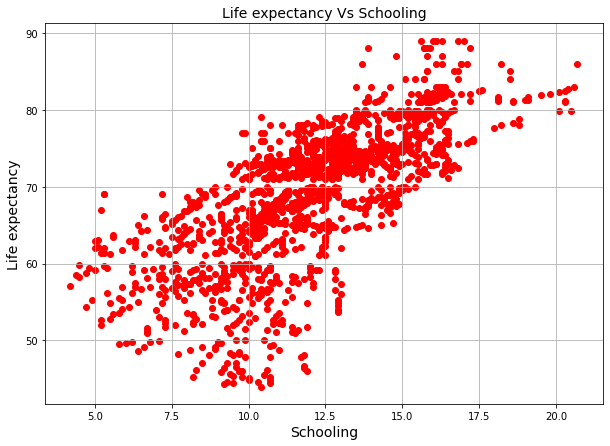

In [9]:
plt.figure(figsize=(10,7))
plt.scatter(data['Schooling'], data['Life expectancy'], color='red')
plt.title('Life expectancy Vs Schooling', fontsize=14)
plt.xlabel('Schooling', fontsize=14)
plt.ylabel('Life expectancy', fontsize=14)
plt.grid(True)
plt.show()

## Insights:

- Clearly, we can see in the above plot that, when the number of years of schooling is increasing, the Life expectancy is also increasing.
- The relationship is linear, as can be seen from the graph.

## Let's check some more features vs Target Variable to better understand the data:

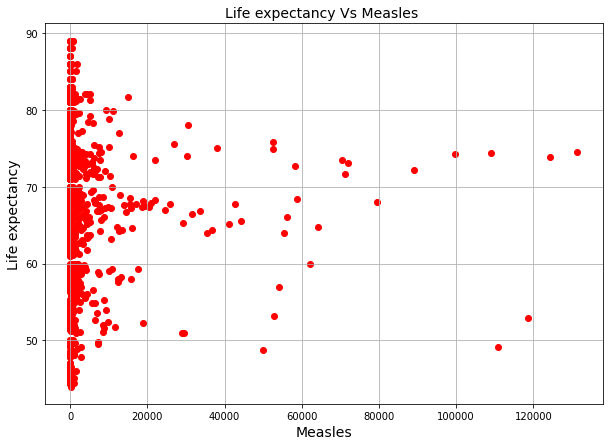

In [10]:
plt.figure(figsize=(10,7))
plt.scatter(data['Measles'], data['Life expectancy'], color='red')
plt.title('Life expectancy Vs Measles ', fontsize=14)
plt.xlabel('Measles', fontsize=14)
plt.ylabel('Life expectancy', fontsize=14)
plt.grid(True)
plt.show()

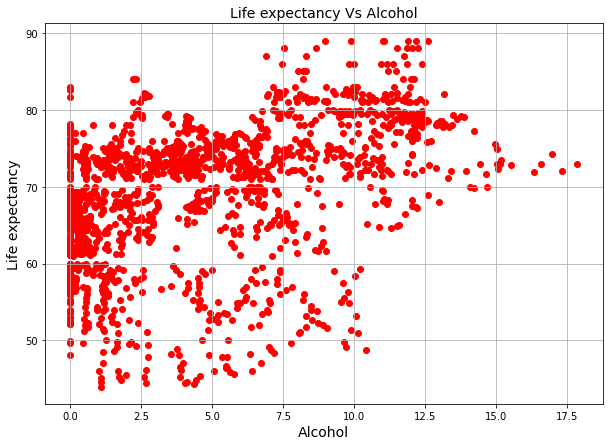

In [11]:
plt.figure(figsize=(10,7))
plt.scatter(data['Alcohol'], data['Life expectancy'], color='red')
plt.title('Life expectancy Vs Alcohol', fontsize=14)
plt.xlabel('Alcohol', fontsize=14)
plt.ylabel('Life expectancy', fontsize=14)
plt.grid(True)
plt.show()

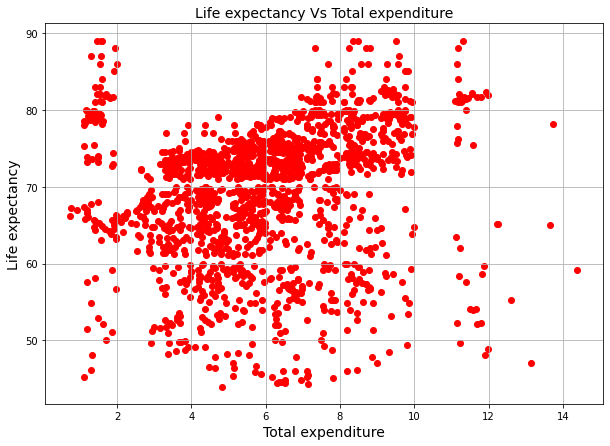

In [12]:
plt.figure(figsize=(10,7))
plt.scatter(data['Total expenditure'], data['Life expectancy'], color='red')
plt.title('Life expectancy Vs Total expenditure', fontsize=14)
plt.xlabel('Total expenditure', fontsize=14)
plt.ylabel('Life expectancy', fontsize=14)
plt.grid(True)
plt.show()

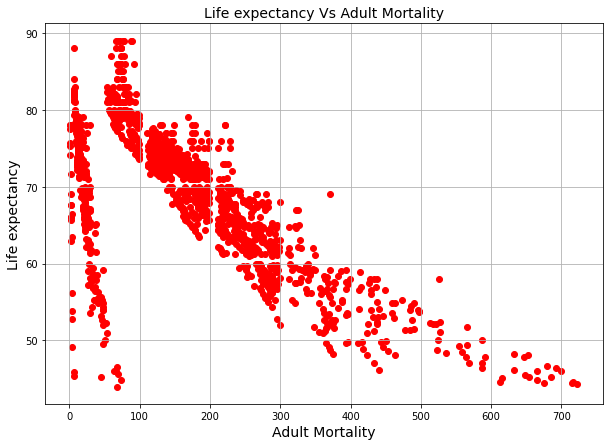

In [13]:
plt.figure(figsize=(10,7))
plt.scatter(data['Adult Mortality'], data['Life expectancy'], color='red')
plt.title('Life expectancy Vs Adult Mortality', fontsize=14)
plt.xlabel('Adult Mortality', fontsize=14)
plt.ylabel('Life expectancy', fontsize=14)
plt.grid(True)
plt.show()

## Insights:

- Here, we see that, as the Adult Mortality is increasing, the Life expectancy is decreasing.
- So, there is inverse relationship between this feature on X-axis and the Target variable on Y-axis.
- Even though the relationship is inverse, but it is linear relationship, as can be seen from the graph.

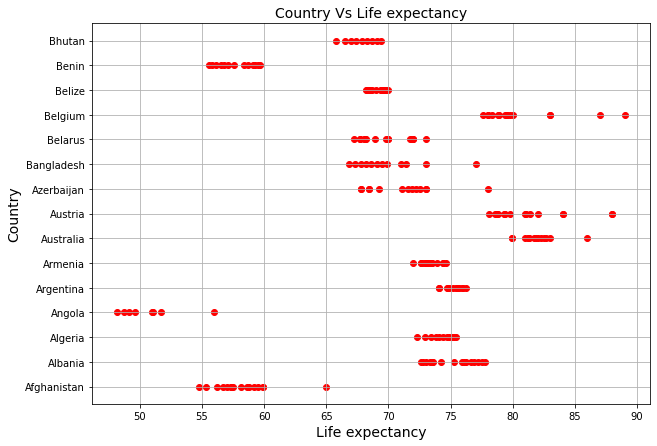

In [14]:
plt.figure(figsize=(10,7))
plt.scatter(data['Life expectancy'][:200], data['Country'][:200], color='red')
plt.title('Country Vs Life expectancy', fontsize=14)
plt.xlabel('Life expectancy', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.grid(True)
plt.show()

## Insights:

- Life expectancy by the country is having a spread of data. (i.e. Some countries might have higher life expectancy and some lower, in the graph, we have plotted 200 data points which are from 15 countries (The names of countries are on Y-axis)
- However, we can see that the red dots are more to the right (near 90 years) for some countries and to the left (less than 50 years) for some countries.

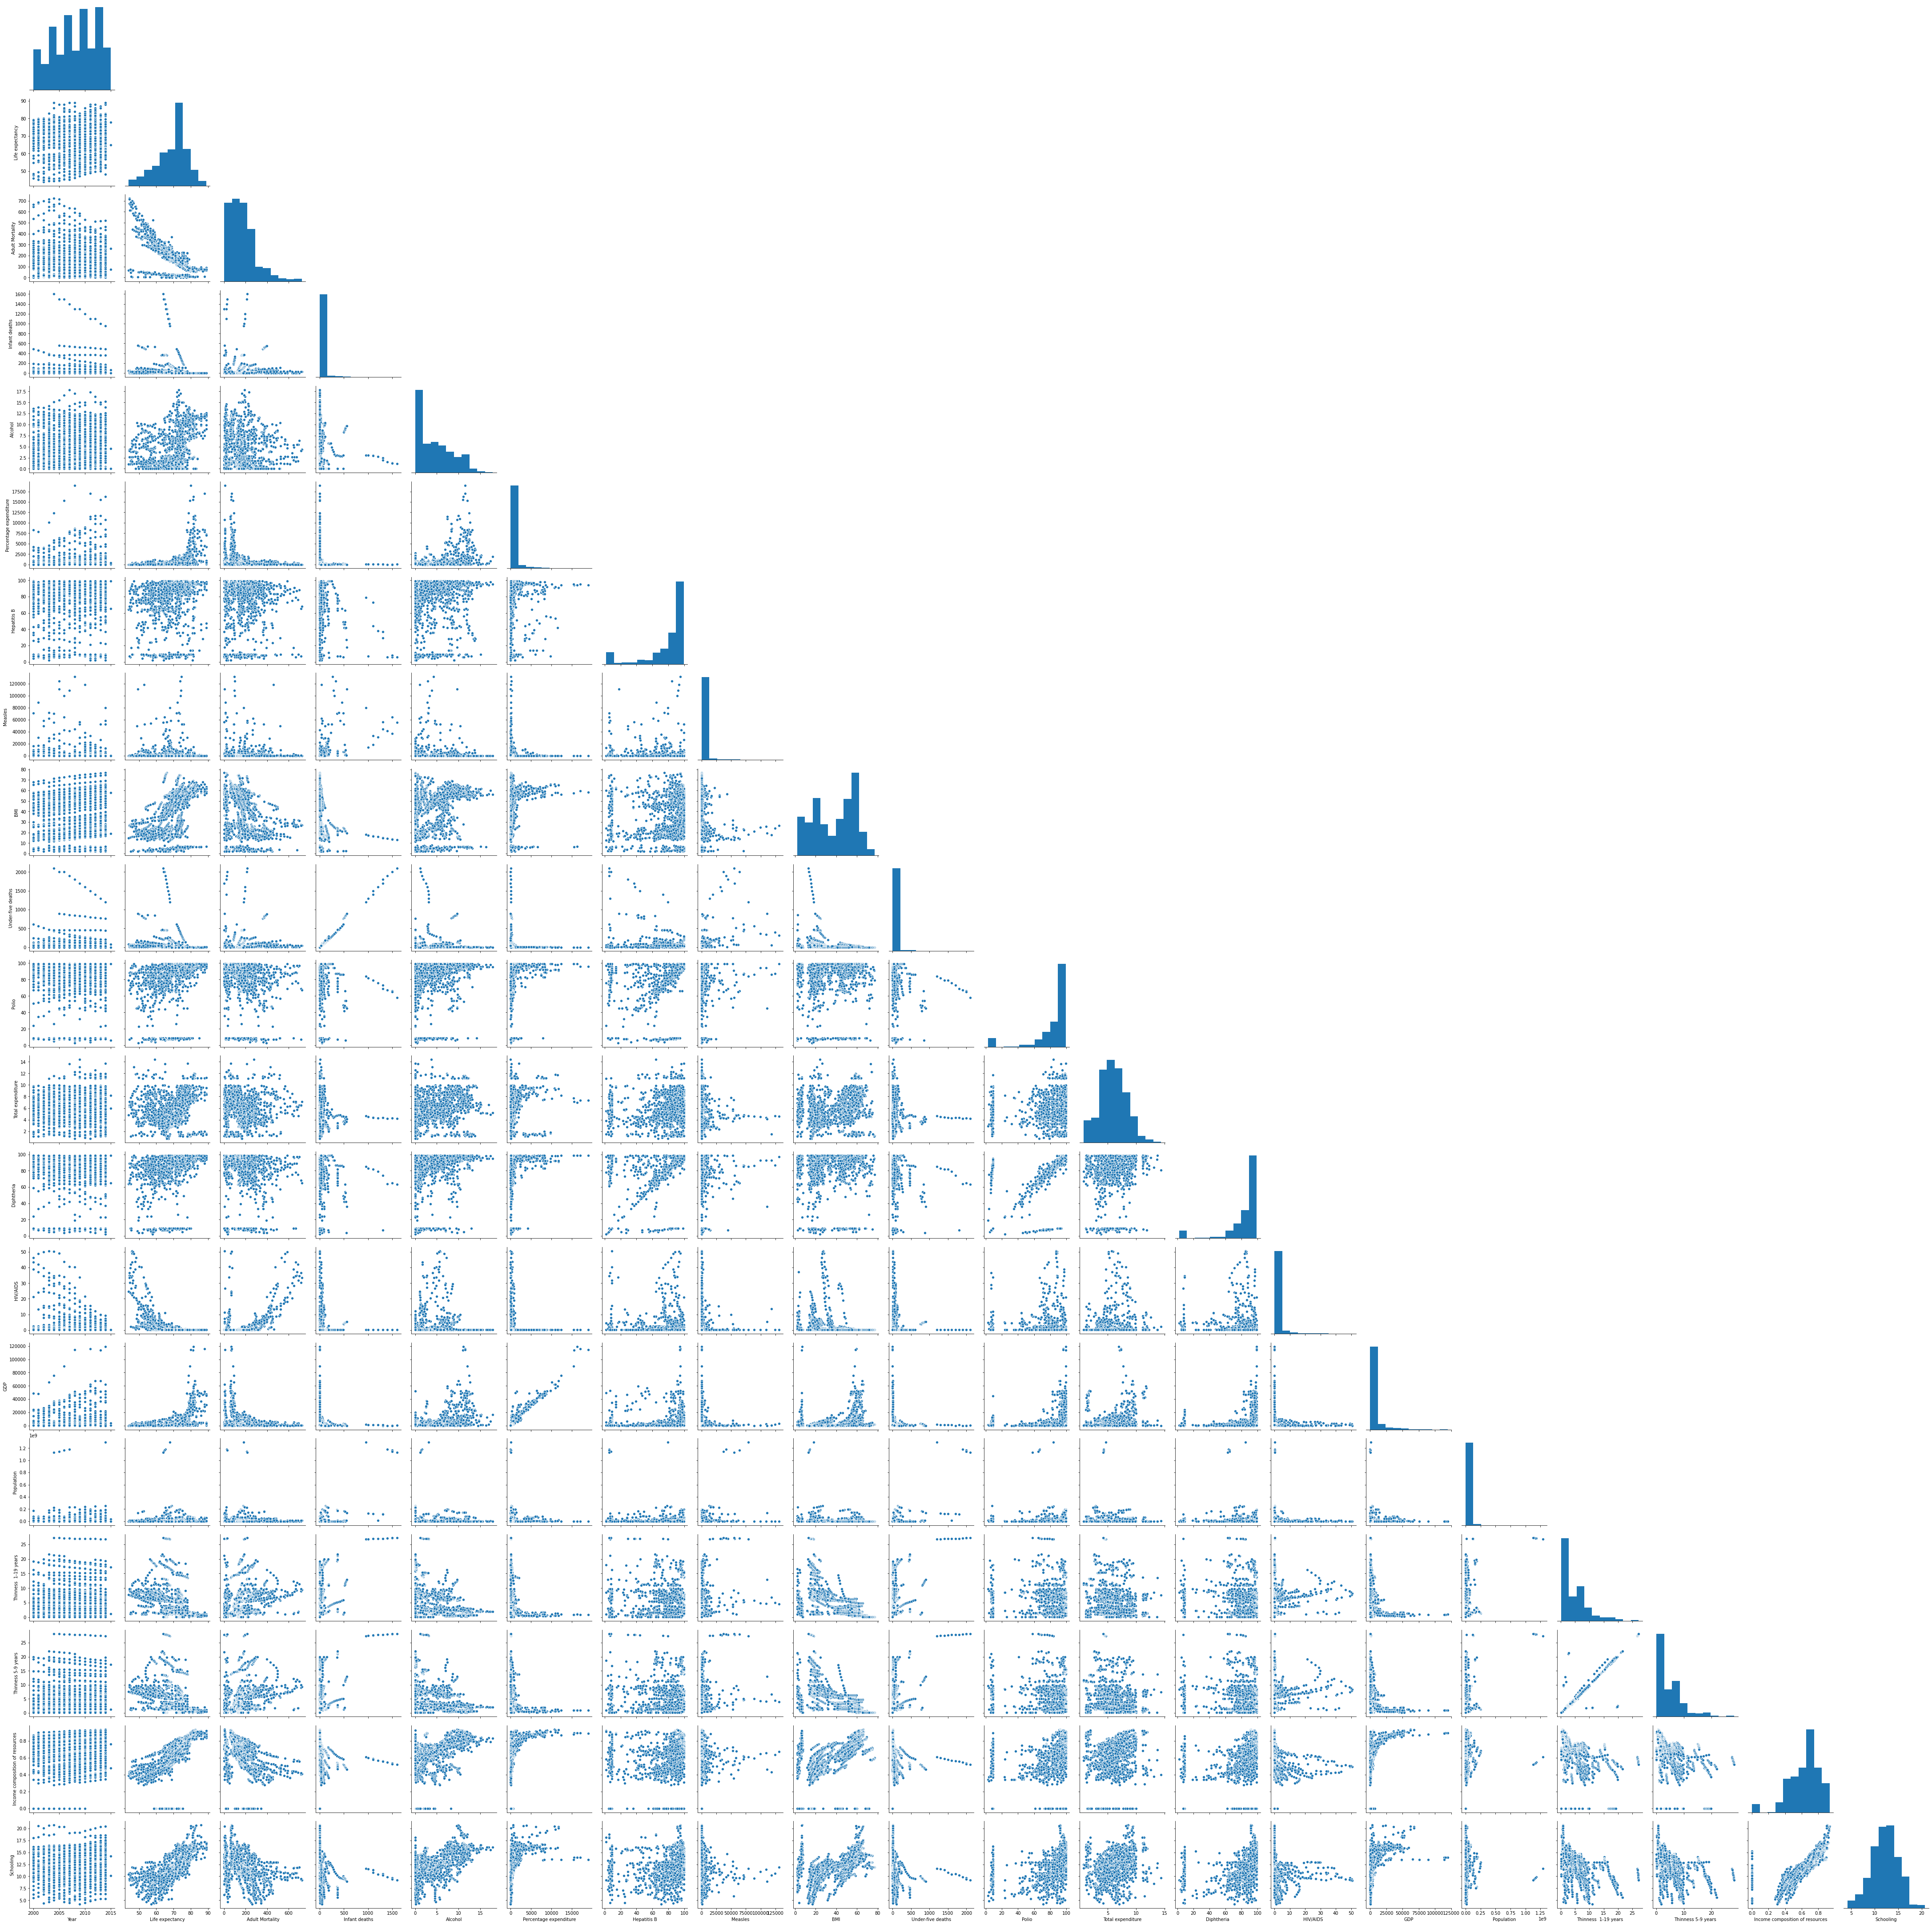

In [15]:
sns.pairplot(data, height=3, diag_kind='auto', corner=True)
plt.show()

## Insights:

- We can see from the 2nd and 3rd column of the graph that, these features have linear (or inversely linear) relationship.

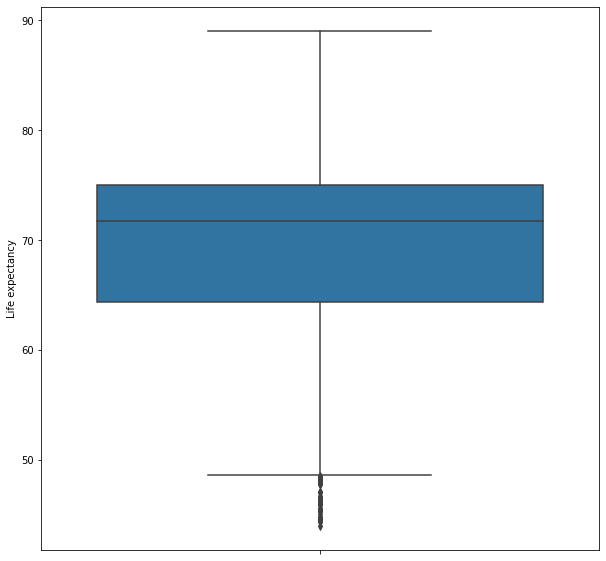

In [16]:
plt.figure(figsize=(10,10))
sns.boxplot(data['Life expectancy'], orient='v')
plt.show()

## Insights:

- The bottom black horizontal line of blue box plot is minimum value, which is around 48 years.
- First black horizontal line of rectangle shape of blue box plot is First quartile or 25 percentile. The age corresponding to this line is 64 years.
- Second black horizontal line of rectangle shape of blue box plot is Second quartile or 50% or median. The age corresponding to this is 72 years.
- Third black horizontal line of rectangle shape of blue box plot is third quartile or 75%. The age corresponding to this is 75 years.
- Top black horizontal line of rectangle shape of blue box plot is maximum value. The value corresponding to this is 88 years.
- Small diamond shape of blue box plot is outlier data or erroneous data. Which is below the bottom black horizontal line.

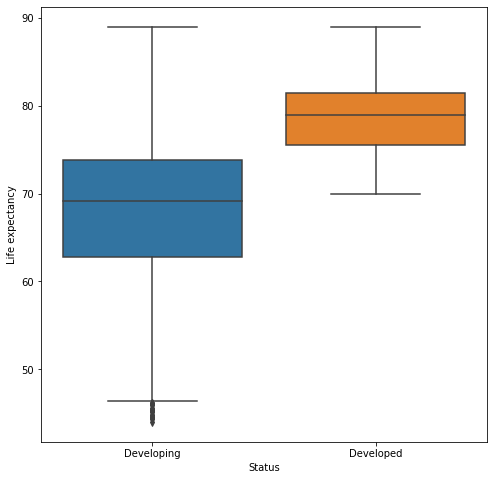

In [17]:
plt.figure(figsize=(8,8))
sns.boxplot(x="Status",y="Life expectancy",data=data)
plt.show()

## Insights:

- The life expectancy in the developed countries is much higher than the developing countries.
- The median value of life expectancy (approximately as can be seen from the boxplot) for:
     - Developing: 69 years
     - Developed: 78 years

In [18]:
data[data.columns[:]].corr()['Life expectancy'][:]

Year                               0.050771
Life expectancy                    1.000000
Adult Mortality                   -0.702523
Infant deaths                     -0.169074
Alcohol                            0.402718
Percentage expenditure             0.409631
Hepatitis B                        0.199935
Measles                           -0.068881
BMI                                0.542042
Under-five deaths                 -0.192265
Polio                              0.327294
Total expenditure                  0.174718
Diphtheria                         0.341331
HIV/AIDS                          -0.592236
GDP                                0.441322
Population                        -0.022305
Thinness  1-19 years              -0.457838
Thinness 5-9 years                -0.457508
Income composition of resources    0.721083
Schooling                          0.727630
Name: Life expectancy, dtype: float64

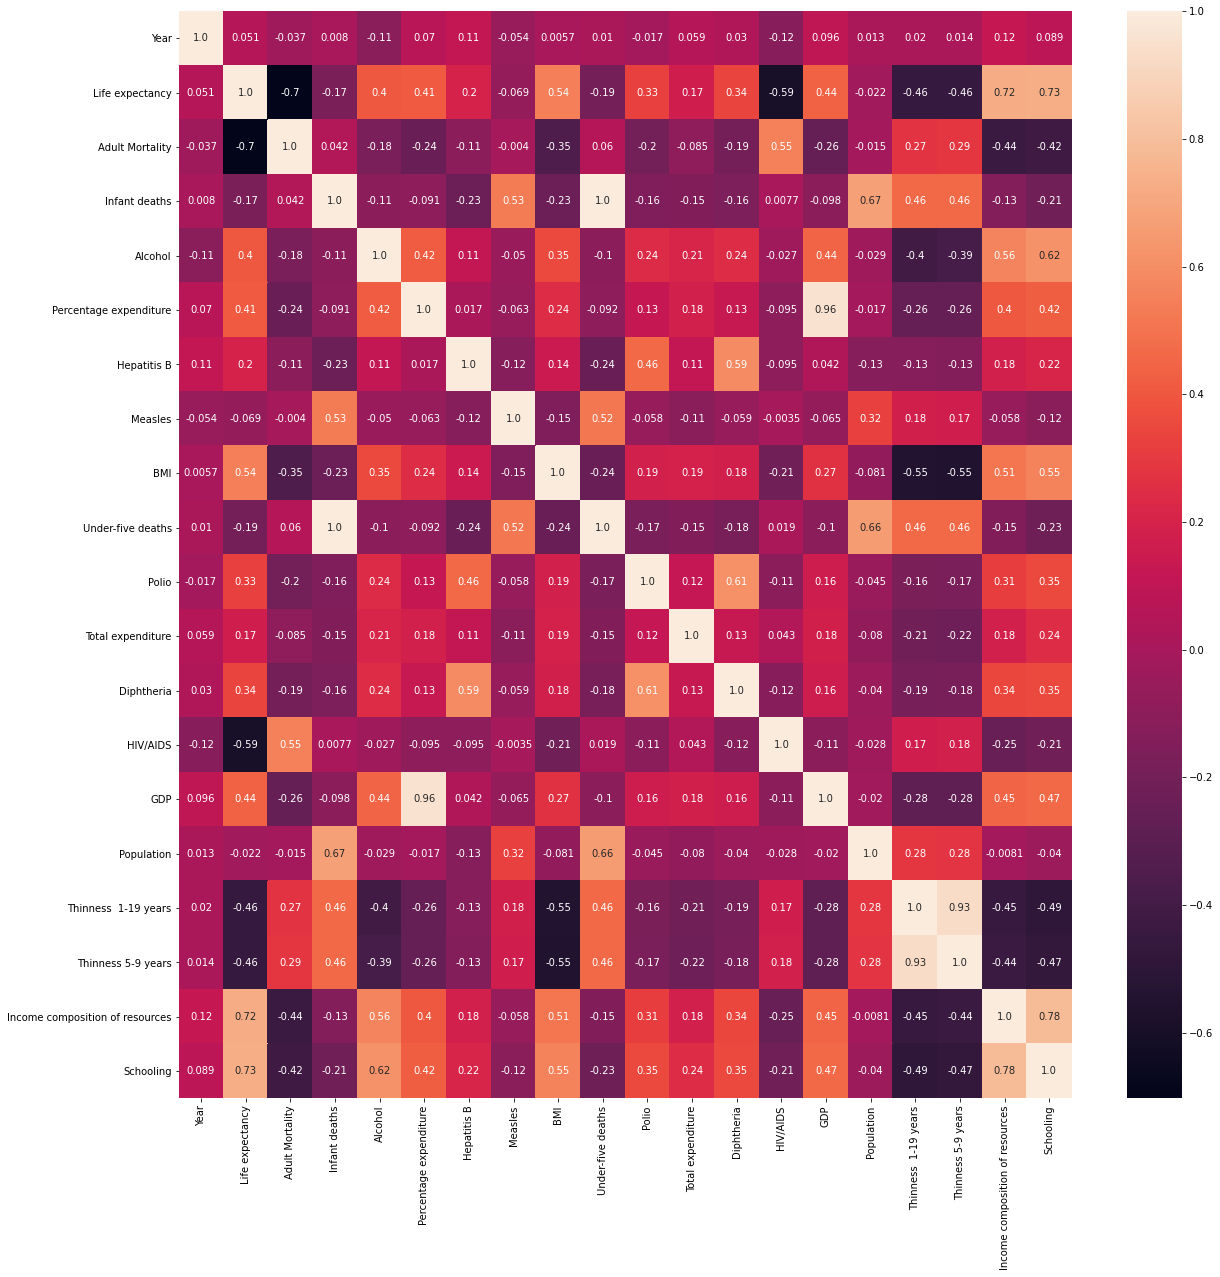

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True, fmt=".2")
plt.show()

## Think about it:

- What is your interpretation from the above plot?

# <a id='link3'>Data Preparation</a>

In [20]:
X = data.drop('Life expectancy', axis=1)
y = data[['Life expectancy']]

print(X.head())
print(y.head())

       Country  Year  ... Income composition of resources  Schooling
0  Afghanistan  2015  ...                           0.479       10.1
1  Afghanistan  2014  ...                           0.476       10.0
2  Afghanistan  2013  ...                           0.470        9.9
3  Afghanistan  2012  ...                           0.463        9.8
4  Afghanistan  2011  ...                           0.454        9.5

[5 rows x 21 columns]
   Life expectancy
0             65.0
1             59.9
2             59.9
3             59.5
4             59.2


In [21]:
print(X.shape)
print(y.shape)

(1649, 21)
(1649, 1)


In [22]:
X = pd.get_dummies(X, columns=['Country', 'Status'])
X.head()

,Year,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling,Country_Afghanistan,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bangladesh,Country_Belarus,Country_Belgium,Country_Belize,Country_Benin,Country_Bhutan,Country_Bosnia and Herzegovina,Country_Botswana,Country_Brazil,Country_Bulgaria,Country_Burkina Faso,Country_Burundi,...,Country_Paraguay,Country_Peru,Country_Philippines,Country_Poland,Country_Portugal,Country_Romania,Country_Russian Federation,Country_Rwanda,Country_Samoa,Country_Sao Tome and Principe,Country_Senegal,Country_Serbia,Country_Seychelles,Country_Sierra Leone,Country_Solomon Islands,Country_South Africa,Country_Spain,Country_Sri Lanka,Country_Suriname,Country_Swaziland,Country_Sweden,Country_Syrian Arab Republic,Country_Tajikistan,Country_Thailand,Country_Timor-Leste,Country_Togo,Country_Tonga,Country_Trinidad and Tobago,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Uganda,Country_Ukraine,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Zambia,Country_Zimbabwe,Status_Developed,Status_Developing
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [23]:
# X.loc[:, 'Country'] = X.loc[:, 'Country'].astype('category')
# X.loc[:, 'Status'] = X.loc[:, 'Status'].astype('category')

# X.loc[:, 'Country'] = X.loc[:, 'Country'].cat.codes
# X.loc[:, 'Status'] = X.loc[:, 'Status'].cat.codes

# X.head()

In [24]:
X = X.values
y = y.values

In [25]:
#split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# <a id='link4'>Choose Model, Train and Evaluate</a>

In [26]:
from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()                                    
linearregression.fit(X_train, y_train)                                  

print("Intercept of the linear equation:", linearregression.intercept_) 
print("\nCOefficients of the equation are:", linearregression.coef_)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pred = linearregression.predict(X_test)                              

Intercept of the linear equation: [-370.39923291]

COefficients of the equation are: [[ 2.18341200e-01 -4.25964999e-04  7.28152554e-02 -1.15746790e-01
  -3.63099112e-05  1.99567320e-03 -4.41703986e-06 -5.08329451e-03
  -5.66462871e-02 -8.57847732e-04 -1.73216617e-02  2.20805981e-03
  -2.78374206e-01 -4.82283671e-07  1.96856265e-09  1.03678482e-02
   5.67478073e-02  5.30962953e-01  4.05983167e-01 -8.78321509e+00
   7.46457660e+00  4.92555582e+00 -1.42658387e+01  6.01520188e+00
   5.88048189e+00  1.94391018e+00  3.65381015e+00  2.32870330e+00
   1.41649360e+00  2.22867048e+00  1.59959049e+00  1.57736876e+00
  -8.60376691e+00 -2.24478644e+00  7.87205973e+00 -8.02143728e+00
   4.38559561e+00 -4.76806306e+00 -7.54779001e+00 -9.85626480e+00
   4.38903310e+00 -2.03678245e+00 -1.00404781e+01  1.34596803e+01
  -1.29481469e+01 -1.23459632e+01  1.06404340e+01  5.31590660e+00
   5.66500450e+00 -5.58832522e+00  1.08326967e+01 -1.71393791e+00
   1.51385508e+00 -3.68586691e+00  4.92769109e+00  6.6436

In [27]:
# Mean Absolute Error
mean_absolute_error(y_test, pred)

1.224371973362461

The mean absolute error (MAE) is the simplest regression error metric to understand. We’ll calculate the residual for every data point, taking only the absolute value of each so that negative and positive residuals do not cancel out. We then take the average of all these residuals. Effectively, MAE describes the typical magnitude of the residuals.

In [28]:
# RMSE
mean_squared_error(y_test, pred)**0.5

2.075715899996284

The root mean square error (RMSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. And then takes the square root of the value.

In [29]:
# R2 Squared:
r2_score(y_test, pred)

0.9454598209381704

R^2 (coefficient of determination) regression score function.

Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

In [30]:
# Training Score
linearregression.score(X_train, y_train)

0.9723226823336297

In [31]:
# Testing score
linearregression.score(X_test, y_test)

0.9454598209381705

#### Now compare the actual output values for X_test with the predicted values, execute the following script:

In [32]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': pred.flatten()})
df

,Actual,Predicted
0,67.5,67.680534
1,73.8,73.785661
2,79.1,80.160082
3,54.9,53.138555
4,48.6,51.046567
...,...,...
490,64.8,65.959530
491,71.4,72.459268
492,77.2,77.069199
493,78.6,77.934372


- We can also visualize comparison result as a bar graph using the below script :

- Note: As the number of records is huge, for representation purpose I’m taking just 25 records.

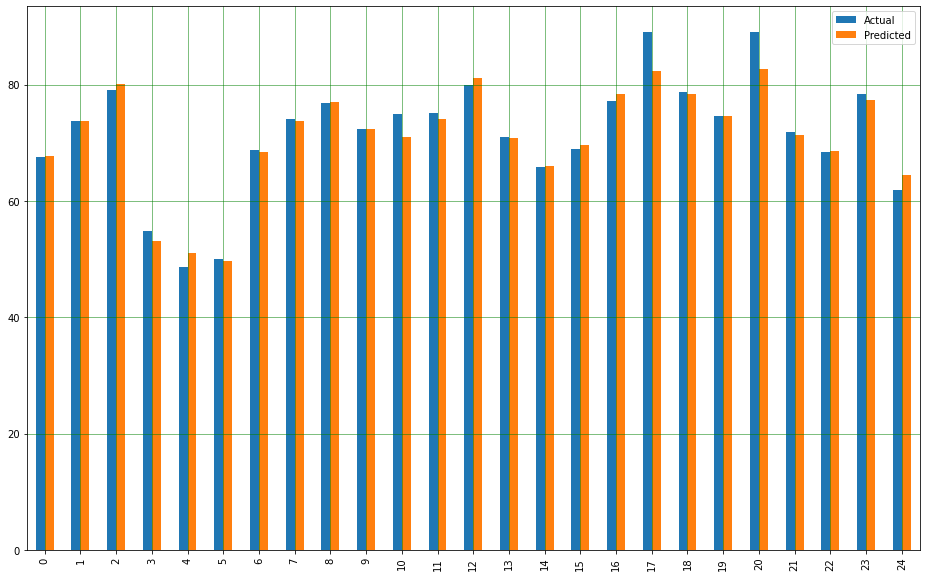

In [33]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

- We can observe here that our model has returned pretty good prediction results.
- The Actual and Predicted values are comparable.

# <a id='link5'>Conclusion</a>

- The Training and testing scores are around 95% and both scores are comparable, hence the model is a good fit.

- R2_score is 0.945, that explains 94.5% % of total variation in the dataset. So, overall the model is very satisfactory.

# <a id='link6'>Add-on: **statsmodels**</a>

- Here is the complete syntax to perform the linear regression in Python using statsmodels.

In [34]:
import statsmodels.api as sm

X = sm.add_constant(X)

linearmodel = sm.OLS(y, X).fit()

predictions = linearmodel.predict(X) 

print_model = linearmodel.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     294.9
Date:                Wed, 09 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:26:47   Log-Likelihood:                -3100.3
No. Observations:                1649   AIC:                             6505.
Df Residuals:                    1497   BIC:                             7327.
Df Model:                         151                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -248.7325     22.406    -11.101      0.0

## Interpreting the Regression Results:

1. **Adjusted. R-squared**: It reflects the fit of the model.
    - R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - In our case, the value for Adj. R-squared is **0.964**, which is good!
2. **const coefficient** is the Y-intercept.
    - It means that if all the dependent variables (features: like Country, status, Adult mortality and so on..) coefficients are zero, then the expected output (i.e., the Y) would be equal to the const coefficient.
    - In our case, the value for const coeff is **-248.7325**
3. **Status coeff**: It represents the change in the output Y due to a change in the status (everything else held constant).
4. **Schooling coeff**: It represents the change in the output Y due to a change of one unit in the Schooling (everything else held constant).
5. **std err**: It reflects the level of accuracy of the coefficients.
    - The lower it is, the higher is the level of accuracy.
6. **P >|t|**: It is p-value.
   - A p-value of less than 0.05 is considered to be statistically significant.
7. **Confidence Interval**: It represents the range in which our coefficients are likely to fall (with a likelihood of 95%).

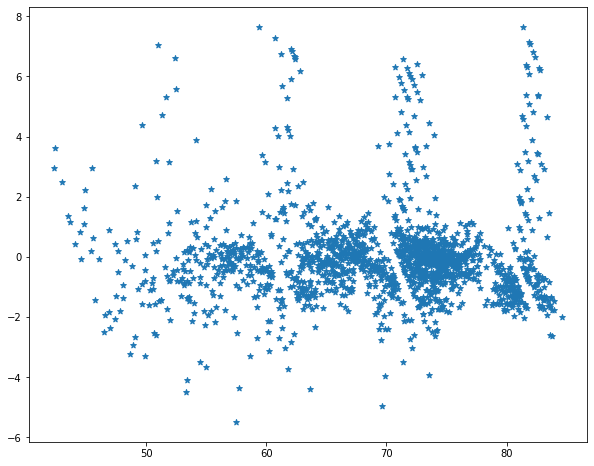

In [35]:
# Plot between residual(actual - predicted) and predicted values
plt.figure(figsize=(10,8))
plt.scatter(linearmodel.predict(), linearmodel.resid, marker='*')
plt.show()

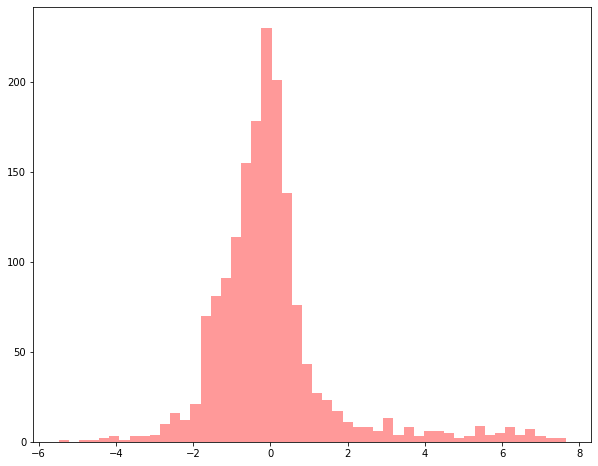

In [36]:
# error distribution
plt.figure(figsize=(10,8))
sns.distplot(linearmodel.resid, hist=True, kde=False, color='red')
plt.show()

# Appendix:


- **warnings.filterwarnings("ignore")** : Never print matching warnings.

- **Pandas** : Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

- **Numpy** : The fundamental package for scientific computing with Python.

- **Matplotlib** : Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

- **Seaborn** : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

- **pairplot** : Plot pairwise relationships in a dataset.

- **boxplot** : Draw a box plot to show distributions with respect to categories.

- **distplot** : Flexibly plot a univariate distribution of observations.

- **pandas.DataFrame.corr** : Compute pairwise correlation of columns, excluding NA/null values.

- **sklearn.linear_model.LinearRegression** : Ordinary least squares Linear Regression.

- **scipy.stats** : This module contains a large number of probability distributions as well as a growing library of statistical functions.

- **statsmodels** : It is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.
    - An extensive list of result statistics are available for each estimator.
    - The results are tested against existing statistical packages to ensure that they are correct.
    - The online documentation is hosted at [statsmodels.org](https://www.statsmodels.org/stable/index.html).